
# **Final Project Notebook**
## **Machine Learning Model Implementation, Optimization, and Evaluation**

### **Project Overview**
This notebook combines multiple stages of the machine learning pipeline, including:
- Data Loading (from PySpark if applicable)
- Data Preprocessing (Cleaning, Normalization, Standardization)
- Model Training & Evaluation
- Model Optimization & Performance Tracking

**Goal:** Achieve a predictive model with at least 75% classification accuracy or 0.80 R-squared.


## **Data Loading**

In [2]:
# Read the CSV files from the Resources folder into Pandas DataFrames.
url_class = "https://raw.githubusercontent.com/MelisaTeg/Project_4/main/Resources/class.csv"
url_zoo = "https://raw.githubusercontent.com/MelisaTeg/Project_4/main/Resources/zoo.csv"
class_df = pd.read_csv(url_class)
zoo_df = pd.read_csv(url_zoo)


In [3]:
# Review the columns wihtin the zoo_df DataFrame.
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# Review the columns, data types, and null values within the zoo_df DataFrame.
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
# Explore whether there are any duplicated values within the zoo_df DataFrame.
zoo_df.duplicated().sum()

0

In [6]:
# Review the class_df DataFrame.
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [7]:
# Review the columns, data types, and null values within the class_df DataFrame.
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [8]:
# Merge the zoo_df and class_df DataFrames on the "class_type" and "Class_Number" columns.
merged_df = zoo_df.merge(class_df, left_on='class_type', right_on='Class_Number')
merged_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [9]:
# Drop the "Class_Number", "Number_Of_Animal_Species_In_Class", and "Animal_Names" columns from the merged_df DataFrame.
merged_df = merged_df.drop(columns=['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'])
merged_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [10]:
# Rename the "Class_Type" column to "animal_class" within the merged_df DataFrame.
merged_df = merged_df.rename(columns={'Class_Type': 'animal_class'})
merged_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,animal_class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [11]:
# Determine values within the 'animal_class' column of the merged_df DataFrame and sort the values according to the index.
merged_df['animal_class'].value_counts().sort_index()

animal_class
Amphibian        4
Bird            20
Bug              8
Fish            13
Invertebrate    10
Mammal          41
Reptile          5
Name: count, dtype: int64

In [17]:
# Drop the "animal_name" and "animal_class" columns from the merged_df DataFrame.
features = merged_df.drop(columns=['animal_name', 'animal_class'])

# Standardize the features before applying the PCA.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply the PCA to reduce the dimensions of the features.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Add the PCA results to the merged_df DataFrame.
merged_df['PCA1'] = pca_result[:, 0]
merged_df['PCA2'] = pca_result[:, 1]


In [31]:
# Review the model's predicted fit.
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).sort_index()
results

,Prediction,Actual
2,Fish,Fish
4,Mammal,Mammal
5,Mammal,Mammal
9,Mammal,Mammal
11,Bird,Bird
26,Amphibian,Amphibian
28,Mammal,Mammal
29,Mammal,Mammal
33,Bird,Bird
35,Mammal,Mammal


In [35]:
# Display the classification report.
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for easier viewing.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Amphibian,1.000000,1.000000,1.000000,1.000000
Bird,1.000000,1.000000,1.000000,5.000000
Bug,0.666667,1.000000,0.800000,2.000000
Fish,1.000000,1.000000,1.000000,3.000000
Invertebrate,1.000000,0.666667,0.800000,3.000000
Mammal,1.000000,1.000000,1.000000,11.000000
Reptile,1.000000,1.000000,1.000000,1.000000
accuracy,0.961538,0.961538,0.961538,0.961538
macro avg,0.952381,0.952381,0.942857,26.000000
weighted avg,0.974359,0.961538,0.961538,26.000000


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# Load datasets
zoo_df = pd.read_csv("zoo.csv")
class_df = pd.read_csv("class.csv")

# Drop 'animal_name' as it's not needed for ML
zoo_df.drop(columns=["animal_name"], inplace=True)

# Check for missing values
print("Missing Values:\n", zoo_df.isnull().sum())

# Encode target variable (class_type)
label_encoder = LabelEncoder()
zoo_df["class_type"] = label_encoder.fit_transform(zoo_df["class_type"])

# Define features (X) and target (y)
X = zoo_df.drop(columns=["class_type"])
y = zoo_df["class_type"]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Missing Values:
 hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64


In [11]:
# Create DataFrame to document results
results_df = pd.DataFrame(grid_search.cv_results_)

# Save as CSV for documentation
results_df.to_csv("model_optimization_results.csv", index=False)

print("Optimization results saved to 'model_optimization_results.csv'")

Optimization results saved to 'model_optimization_results.csv'


In [26]:
# Connect to SQLite database
conn = sqlite3.connect("zoo_database.db")

# Load CSV data into a Pandas DataFrame
zoo_df = pd.read_csv("zoo.csv")

# Save it into SQLite
zoo_df.to_sql("zoo_data", conn, if_exists="replace", index=False)

conn.close()

print("✅ Table 'zoo_data' has been created successfully in SQLite!")


✅ Table 'zoo_data' has been created successfully in SQLite!


In [28]:
conn = sqlite3.connect("zoo_database.db")
query = "SELECT * FROM zoo_data"
zoo_df = pd.read_sql(query, conn)
conn.close()

print("✅ Data successfully retrieved from SQL!")


✅ Data successfully retrieved from SQL!


In [30]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("zoo_database.db")

# Read the dataset into a Pandas DataFrame
query = "SELECT * FROM zoo_data"
zoo_df = pd.read_sql(query, conn)

conn.close()


In [95]:

# Read the CSV files from the Resources folder into Pandas DataFrames.
url_class = "https://raw.githubusercontent.com/MelisaTeg/Project_4/main/Resources/class.csv"
url_zoo = "https://raw.githubusercontent.com/MelisaTeg/Project_4/main/Resources/zoo.csv"
class_df = pd.read_csv(url_class)
zoo_df = pd.read_csv(url_zoo)

In [96]:
# Review the class_df DataFrame
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [103]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({'Prediction': predictions, 'Actual': y_test})
predictions_df = predictions_df.sort_index()
predictions_df

,Prediction,Actual
17,1,1
31,1,1
32,1,1
33,2,2
35,1,1
36,1,1
38,4,4
39,6,6
40,6,6
44,1,1


In [104]:
report = classification_report(y_test, predictions, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
1,1.0,1.0,1.0,12.0
2,1.0,1.0,1.0,5.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,2.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,2.0
7,1.0,1.0,1.0,3.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,26.0
weighted avg,1.0,1.0,1.0,26.0


## **Data Preprocessing**

In [29]:
# Standardize the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **Model Training & Evaluation**

In [24]:
#Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [30]:
# Create a Logistic Regression model.
classifier = LogisticRegression(max_iter=1000, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



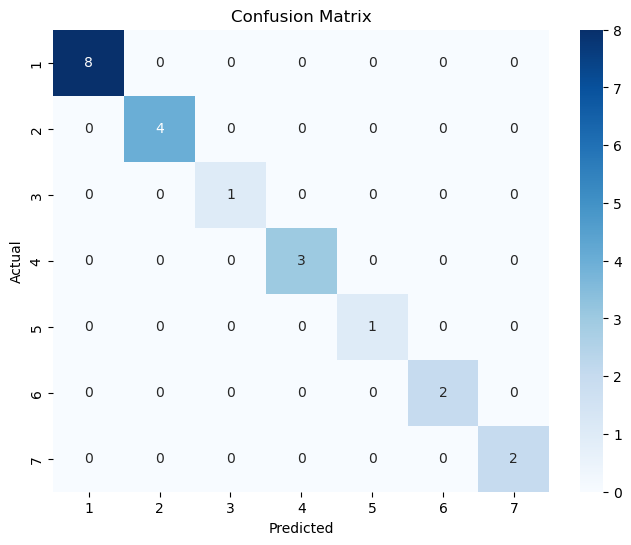

In [12]:
# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10, None],
    'min_samples_split': [5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate performance
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Model Accuracy: 1.0


📊 Final Optimized Model Accuracy: 1.00

🔹 Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



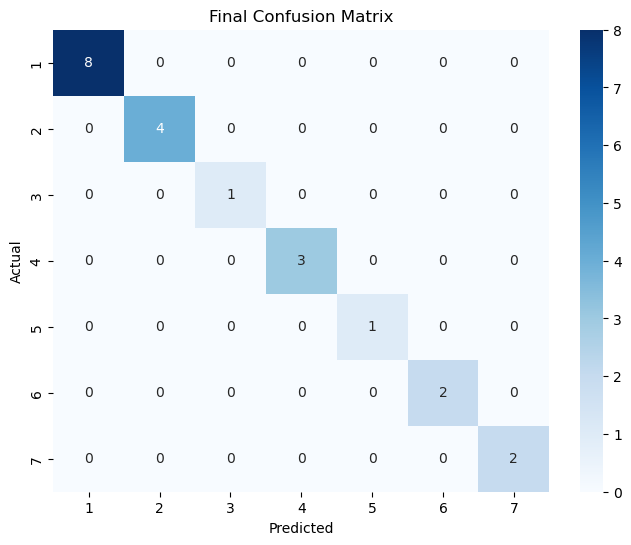

In [13]:
# Re-evaluate the optimized model
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"📊 Final Optimized Model Accuracy: {final_accuracy:.2f}")

# Display Classification Report
print("\n🔹 Final Classification Report:\n", classification_report(y_test, y_pred_best))

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap="Blues", fmt="d", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Final Confusion Matrix")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (assuming all except class_type are numeric)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [94]:

# Import the modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
classifier = LogisticRegression(solver='lbfgs', random_state=1)


In [102]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=1)

## **Model Optimization**

## **Results & Conclusion**

In [21]:
# Identify the kmeans score.
score = kmeans.score(features_scaled, merged_df['cluster'])
print(f'Score: {score:.2f}')

Score: -562.28


In [33]:
#Import dependencies.
from sklearn.metrics import classification_report, confusion_matrix

## **Visualizations & Results**

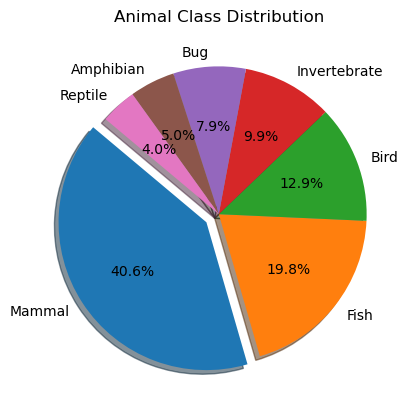

In [13]:
# Plot pie chart.
plt.pie(values, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Animal Class Distribution')
plt.show()


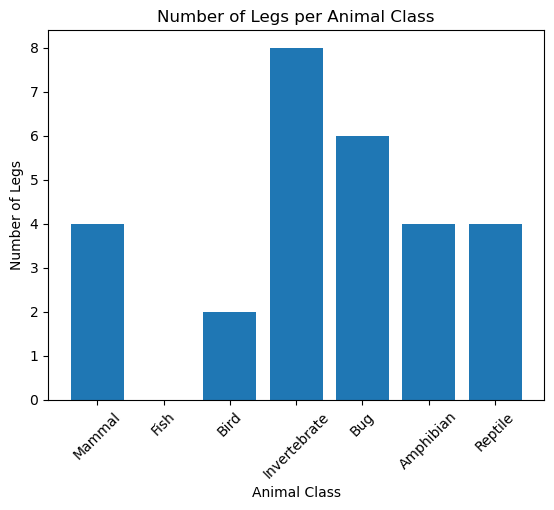

In [14]:
# Plot a bar chart to show the number of legs per animal class.
x = merged_df['animal_class']
y = merged_df['legs']

plt.bar(x, y)
plt.xlabel('Animal Class')
plt.ylabel('Number of Legs')    
plt.title('Number of Legs per Animal Class')
plt.xticks(rotation=45)
plt.show()

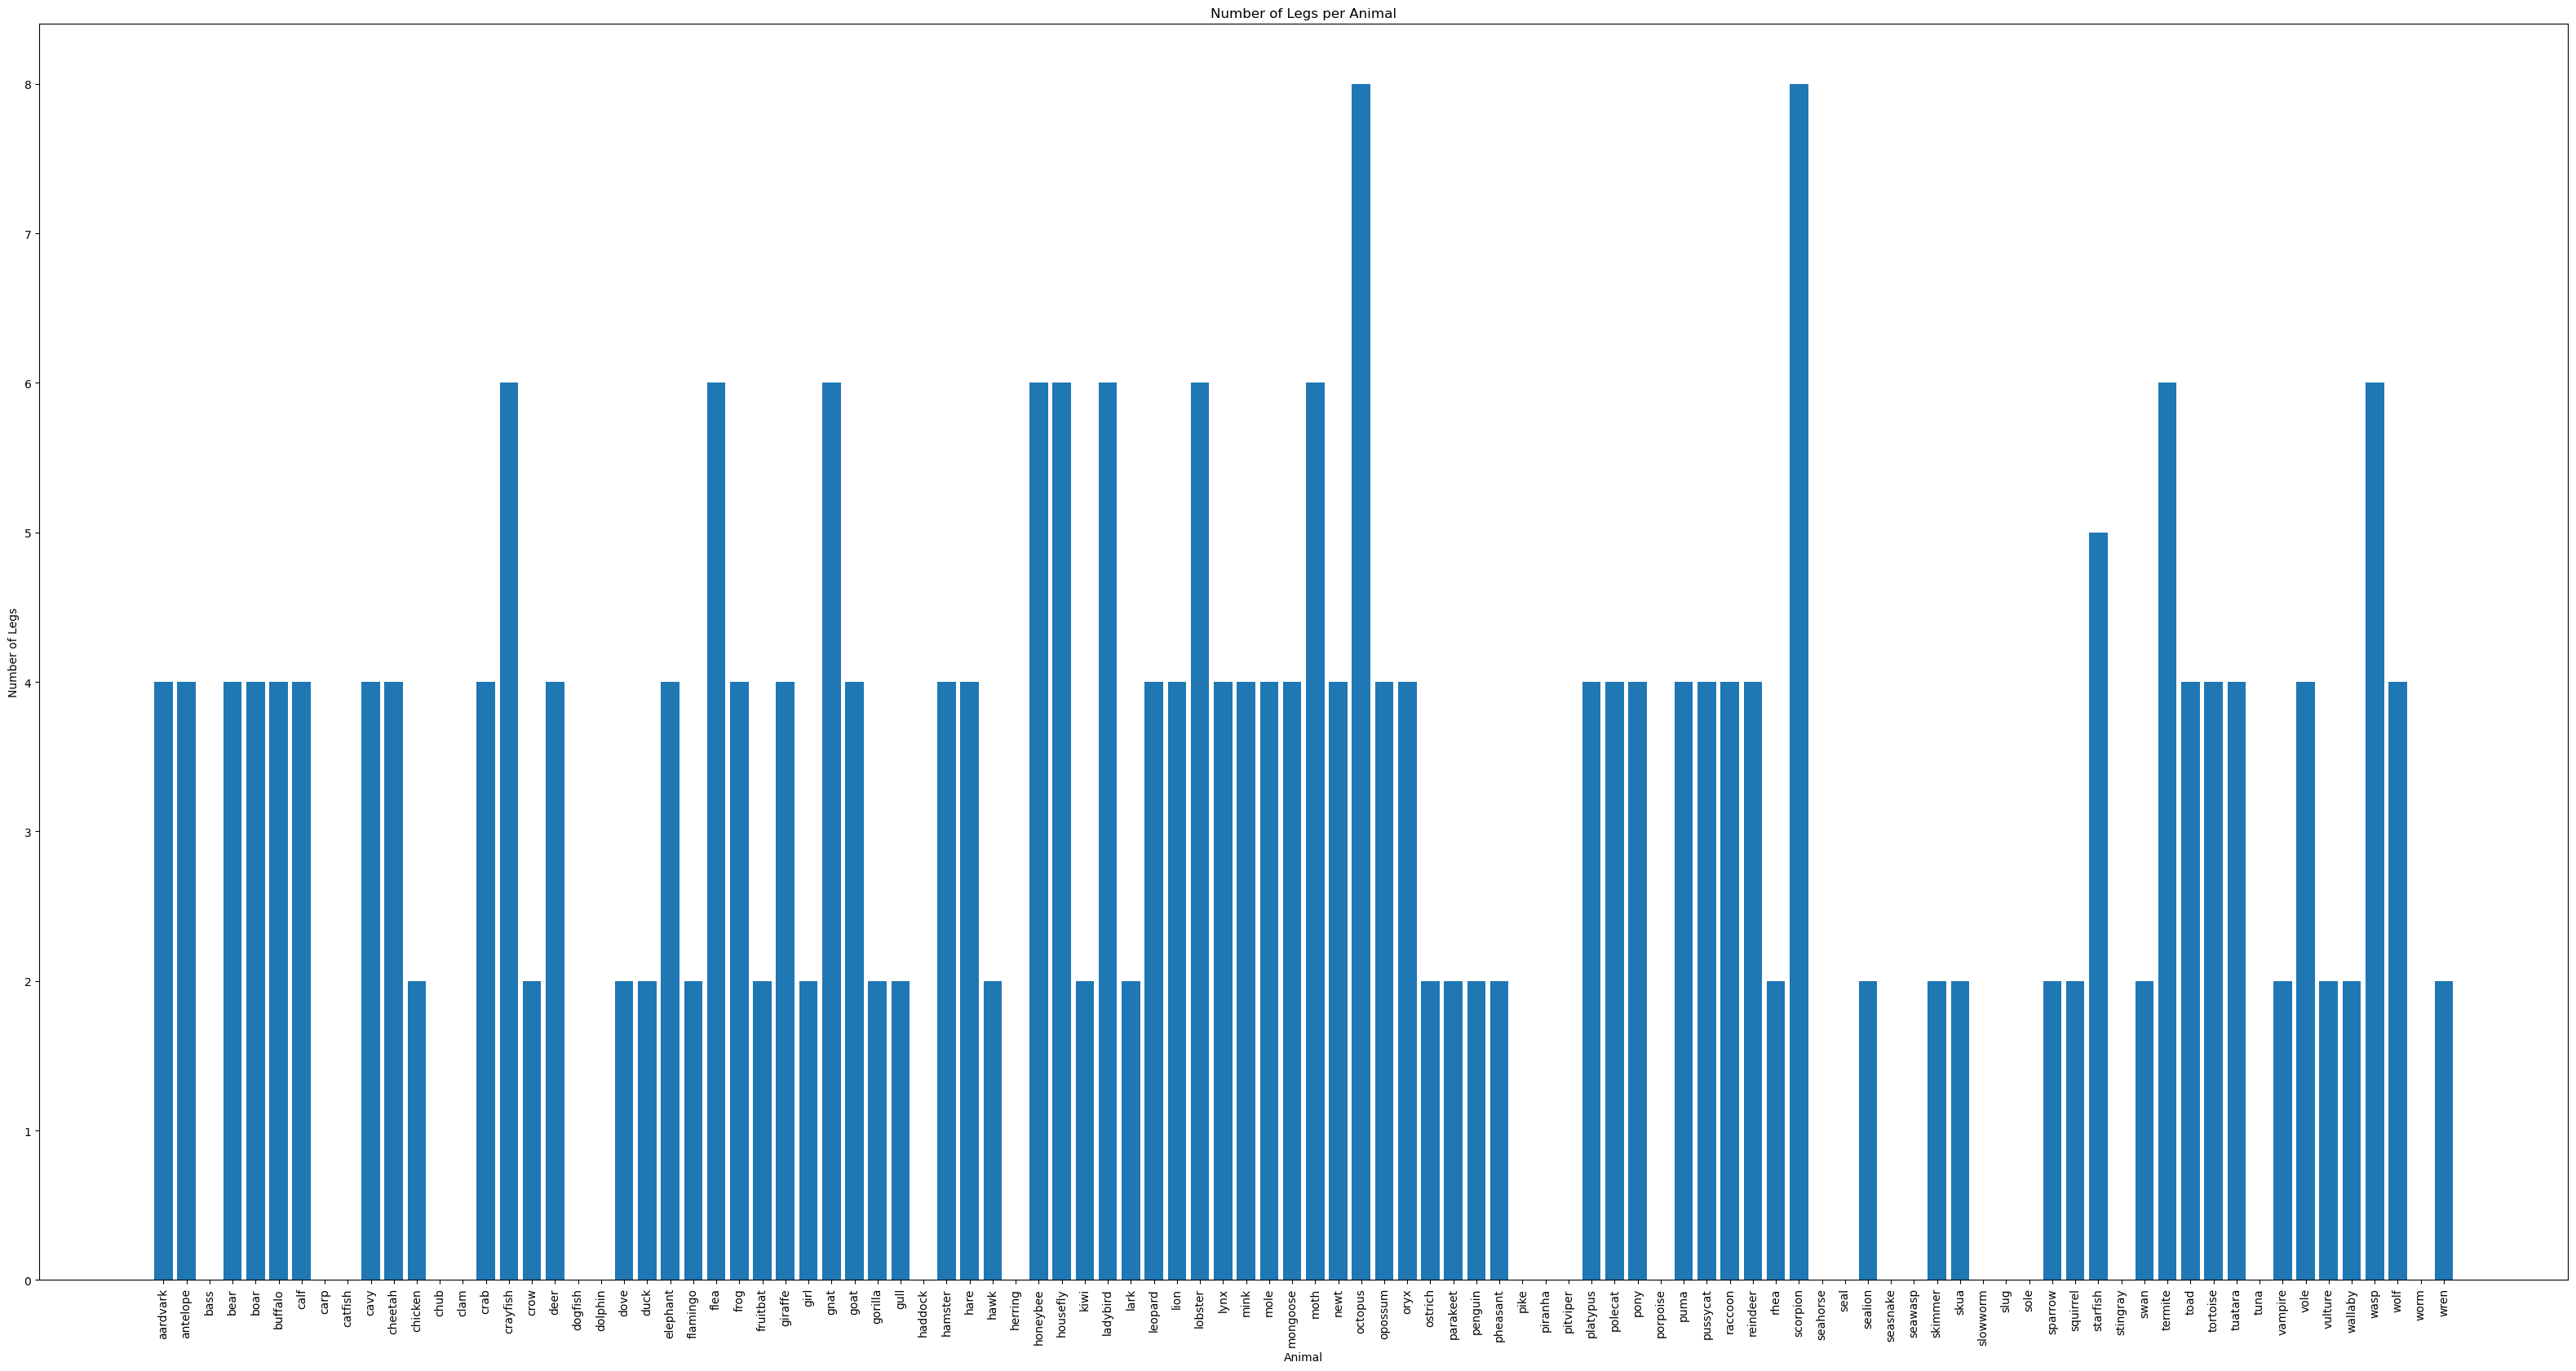

In [15]:
# Plot a bar chart to show the number of legs per animal.
x = merged_df['animal_name']
y = merged_df['legs']

plt.figure(figsize=(40, 20))
plt.bar(x, y)
plt.xlabel('Animal')
plt.ylabel('Number of Legs')    
plt.title('Number of Legs per Animal')
plt.xticks(rotation=90)
plt.show()

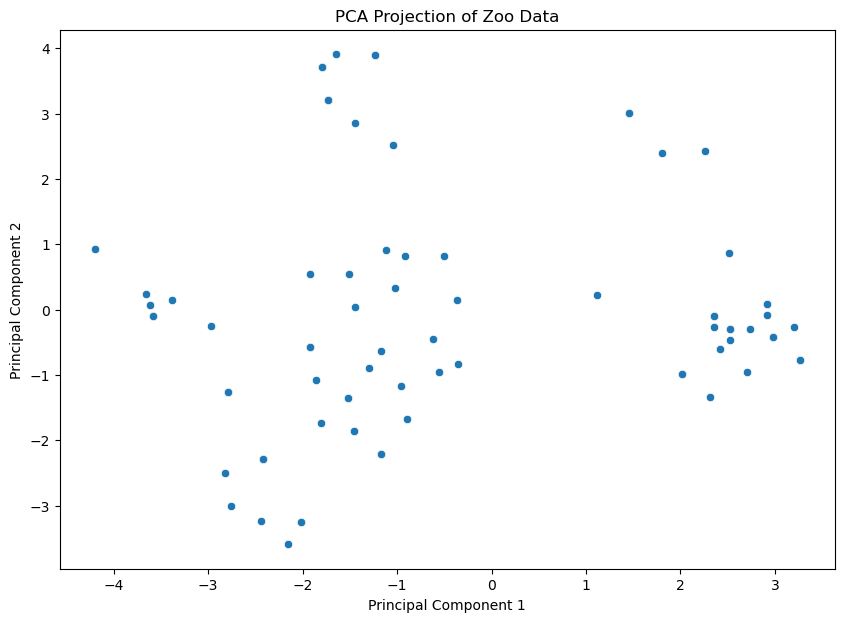

In [18]:
# Plot the PCA projection of the zoo data.
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(data=merged_df, x='PCA1', y='PCA2')
plt.title('PCA Projection of Zoo Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

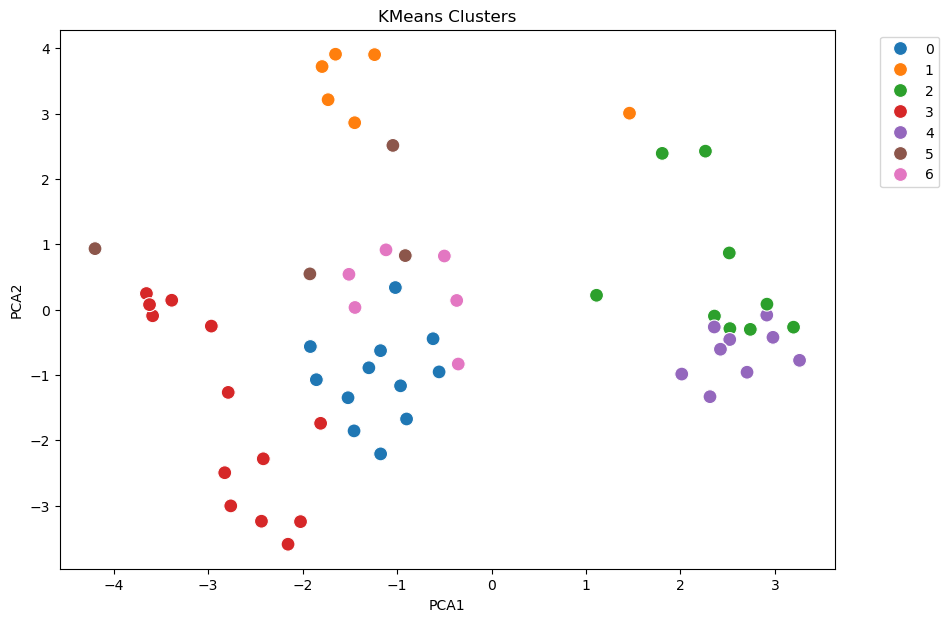

In [22]:
# Plot the KMeans clustering.
plt.figure(figsize=(10,7))
sns.scatterplot(data=merged_df, x='PCA1', y='PCA2', hue='cluster', palette='tab10', s=100)
plt.title('KMeans Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\melit\AppData\Local\Temp\ipykernel_28756\3277948671.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


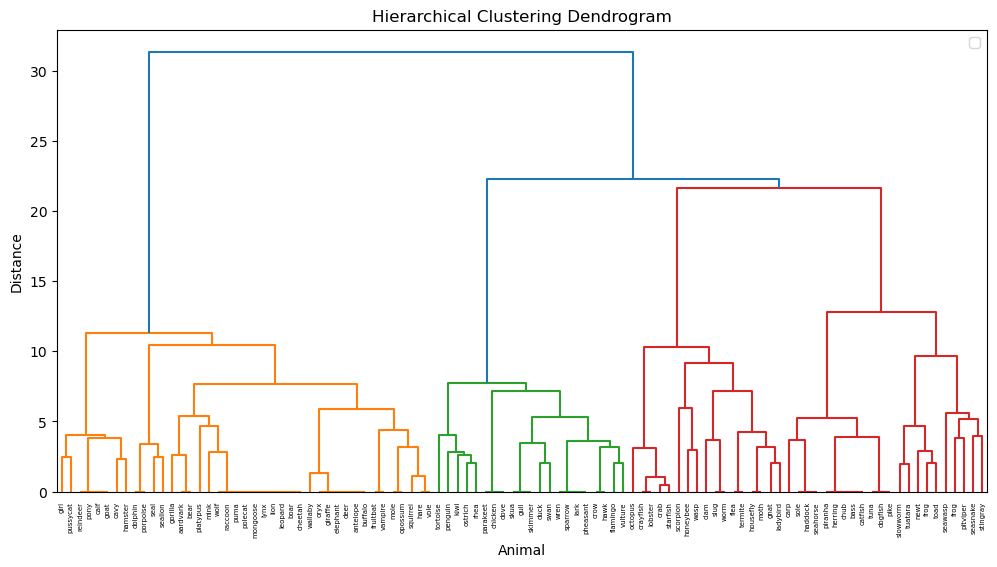

In [23]:
# Import dependencies.
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering.  
linked = linkage(features_scaled, method='ward')

# Plot the hierarchical clustering dendrogram.
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=merged_df['animal_name'].values,
           leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Animal')
plt.ylabel('Distance')
plt.legend()
plt.show()